<a href="https://colab.research.google.com/github/spalominor/programacionparaingenieria/blob/main/PALOMINOs_SI05_v20240517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## «*Quien no se mueve, no siente las cadenas*».
### [Rosa de Luxemburgo](https://es.wikipedia.org/wiki/Rosa_Luxemburgo)

# SI05 GeoPandas SciPy

Actividad individual.

Utilice el dataset asignado en [datasets geopandas](https://docs.google.com/spreadsheets/d/e/2PACX-1vR3xU0NkXVW-ZzKwygg0QecuJRhA2ssj-t67tN3inRTHUcPbeZFONbTevZfc7k7YtmTeR-O-LrsDkee/pubhtml).

Resuelva los siguientes ejercicios con códigos que se ajusten al PEP8. Recuerde incluir los comentarios en el código y documentar las funciones con docstrings al estilo de Google.

**Importante:**

**no se permite la utilización de ciclos (for or while) para resolver los ejercicios.**

**todos los ejercicios deben ser resueltos con Pandas.**

# Instalar GeoPandas

GeoPandas no es una librería nativa de Python por lo que **requiere ser instalada antes de ser invocada**.


In [117]:
# Instalar GeoPandas
!pip install geopandas

# Preparación del ejercicio

*   Importe las librerías requeridas
*   Lea el dataset a utilizar, **UNA SOLA VEZ**, desde una url y utilice esa información para resolver los ejercicios indicados

Sugerencia: suba el dataset a Googledrive y luego publíquelo como página web. El siguiente enlace le indica cómo hacerlo: [Cómo publicar archivos de Documentos, Hojas de cálculo, Presentaciones y Formularios de Google](https://support.google.com/docs/answer/183965?hl=es-419&co=GENIE.Platform%3DDesktop).

Nota: si lo desea puede utilizar otro método para obtener la url del dataset.



In [118]:
# Escriba aquí su código

# Importar las librerías necesarias
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import scipy as sp



# Conocer la versiones de las librerías instaladas
print(f"pandas: {pd.__version__}")
print(f"geopandas: {gpd.__version__}")
print(f"scipy: {sp.__version__}")
# Se necesita importar matplotlib en todo su conjunto para ver la versión
#print("Versión de MatPlotLib: ", matplotlib.__version__)
# >>> Versión de MatPlotLib:  3.7.1

# Guardar en la variable 'ruta' la url del dataset
ruta = (
    'https://raw.githubusercontent.com/spalominor/programacionparaingenieria'
    '/main/HDI.csv'
)

ruta_geojson = (
    'https://raw.githubusercontent.com/spalominor/programacionparaingenieria'
    '/main/countries.geojson'
)

# Cargar el dataset a partir de la ruta establecida
df = pd.read_csv(ruta)
gdf = gpd.read_file(ruta_geojson)

# Verificar la lectura del dataset
#print(df.head())
print(gdf.head())

pandas: 2.0.3
geopandas: 0.13.2
scipy: 1.11.4
   scalerank       featurecla  labelrank      sovereignt sov_a3  adm0_dif  \
0          3  Admin-0 country        5.0     Netherlands    NL1       1.0   
1          1  Admin-0 country        3.0     Afghanistan    AFG       0.0   
2          1  Admin-0 country        3.0          Angola    AGO       0.0   
3          1  Admin-0 country        6.0  United Kingdom    GB1       1.0   
4          1  Admin-0 country        6.0         Albania    ALB       0.0   

   level               type        admin adm0_a3  ...      continent  \
0    2.0            Country        Aruba     ABW  ...  North America   
1    2.0  Sovereign country  Afghanistan     AFG  ...           Asia   
2    2.0  Sovereign country       Angola     AGO  ...         Africa   
3    2.0         Dependency     Anguilla     AIA  ...  North America   
4    2.0  Sovereign country      Albania     ALB  ...         Europe   

  region_un        subregion                  region_wb na

## Ejercicio 00

Muestre las principales características del dataset utilizando pandas.

En particular muestre los nombres de las columnas y sus tipos; el índice del dataset; la forma del dataset.

In [119]:
# Escriba su código aquí

# Mostrar los nombres de las columnas y sus tipos de datos
print("Nombres de las columnas y tipos de datos:")
print(gdf.info())

# Mostrar el índice del dataset
print("\nÍndice del dataset:")
print(gdf.index)

# Mostrar la forma del dataset
print("\nForma del dataset:")
print(gdf.shape)


Nombres de las columnas y tipos de datos:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   241 non-null    int64   
 1   featurecla  241 non-null    object  
 2   labelrank   241 non-null    float64 
 3   sovereignt  241 non-null    object  
 4   sov_a3      241 non-null    object  
 5   adm0_dif    241 non-null    float64 
 6   level       241 non-null    float64 
 7   type        241 non-null    object  
 8   admin       241 non-null    object  
 9   adm0_a3     241 non-null    object  
 10  geou_dif    241 non-null    float64 
 11  geounit     241 non-null    object  
 12  gu_a3       241 non-null    object  
 13  su_dif      241 non-null    float64 
 14  subunit     241 non-null    object  
 15  su_a3       241 non-null    object  
 16  brk_diff    241 non-null    float64 
 17  name        241 non-null    object  
 18  

## Ejercicio 01

Ubique en un mapa las coordenadas de los puntos contenidos en el dataset.

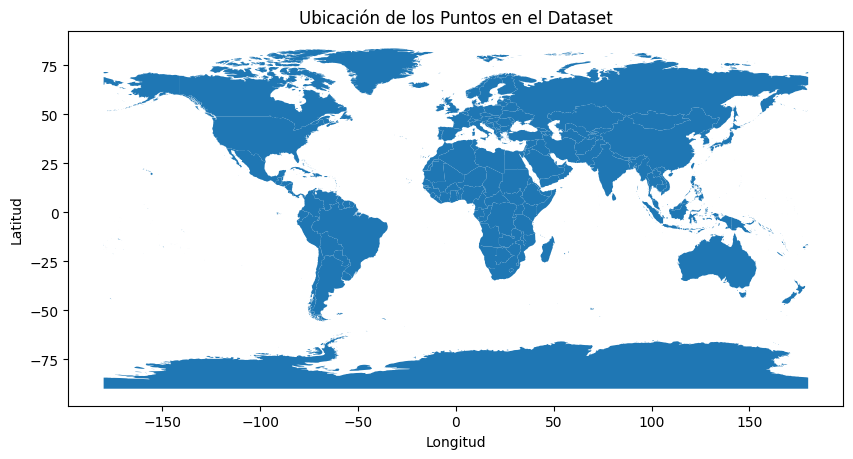

In [120]:
# Escriba su código aquí

 # Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear los datos
gdf.plot(ax=ax)

# Añadir título y etiquetas
ax.set_title('Ubicación de los Puntos en el Dataset')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

## Ejercicio 02

Ubique en un mapa los cinco puntos más alejados del centro del dataset.

235    Wallis and Futuna Is.
217                    Tonga
236                    Samoa
160                     Niue
10            American Samoa
Name: name, dtype: object


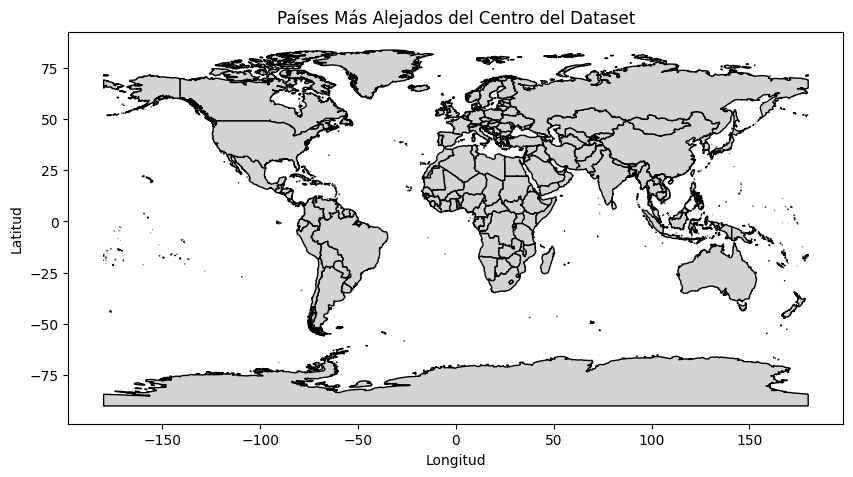

In [121]:
# Escriba su código aquí

# Importar la clase Point para convertir coordenadas a objetos Point
from shapely.geometry import Point



def calcular_centro_dataset(gdf):
    """Calcula el centro del dataset utilizando la mediana de las coordenadas.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene los datos.

    Returns:
        Point: El punto central del dataset.
    """
    # Proyectar los datos a un sistema de coordenadas proyectadas adecuado
    # Proyección de Mercator para evitar advertencias de Geopandas
    gdf = gdf.to_crs('EPSG:3395')

    # Calcular el centroide de cada país
    centroides = gdf.centroid

    # Calcular el punto medio de las latitudes y longitudes
    centro_latitud = centroides.y.mean()
    centro_longitud = centroides.x.mean()

    return Point(centro_longitud, centro_latitud)


def encontrar_puntos_mas_alejados(gdf, centro, n=100):
    """Encuentra los n puntos más alejados del centro del dataset.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene los datos.
        centro (Point): El centro del dataset.
        n (int): El número de puntos a encontrar (por defecto, 100).

    Returns:
        GeoDataFrame: GeoDataFrame con los n puntos más alejados.
    """
    # Proyectar a un sistema de coordenadas proyectado
    # Proyección de Mercator para evitar advertencias de Geopandas
    gdf = gdf.to_crs("EPSG:3395")

    # Calcular la distancia de cada país al centro
    gdf['distancia_al_centro'] = gdf.distance(centro)

    # Retornar los n países más lejanos
    return gdf.nlargest(n, 'distancia_al_centro')


def dibujar_mapa_de_lejanos(gdf, outliers_gdf):
    """Plotea un mapa con todos los puntos y resalta los puntos más alejados.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene todos los puntos.
        outliers_gdf (GeoDataFrame): El GeoDataFrame que contiene los puntos
        más alejados.

    Returns:
        None
    """
    # Proyectar el GeoDataFrame a un sistema de coordenadas geográficas
    gdf = gdf.to_crs('EPSG:4326')
    outliers_gdf = outliers_gdf.to_crs('EPSG:4326')

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotear los países más alejados
    gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
    outliers_gdf.plot(ax=ax, color='red', edgecolor='black')

    # Añadir título y etiquetas
    ax.set_title('Países Más Alejados del Centro del Dataset')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el gráfico
    plt.show()


# Calcular el centro del dataset
centro = calcular_centro_dataset(gdf)

# Encontrar los cinco puntos más alejados del centro
puntos_mas_alejados = encontrar_puntos_mas_alejados(gdf, centro, n=5)

# Imprimir los cinco puntos más alejados
print(puntos_mas_alejados['name'])

# Plotear un mapa con los puntos más alejados resaltados
dibujar_mapa_de_lejanos(gdf, puntos_mas_alejados)


## Ejercicio 03

Calcule la distancia euclideana para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es máxima.

In [122]:
# Escriba su código aquí

# Importar la función de SciPy distance_matrix
from scipy.spatial import distance_matrix

def calcular_distancias_euclidianas(gdf):
    """Calcula la distancia euclidiana entre los puntos del dataset.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene los datos.

    Returns:
        DataFrame: Un DataFrame con las distancias euclidianas
        entre los puntos
    """
    # Proyectar los datos a un sistema de coordenadas proyectadas adecuado
    gdf_projected = gdf.to_crs('EPSG:3395')

    # Obtener los centroides de los países
    centroides = gdf_projected.geometry.centroid

    # Crear una matriz de coordenadas de los centroides
    coords = list(zip(centroides.x, centroides.y))

    # Calcular la distancia euclidiana entre los puntos utilizando SciPy
    dist_matrix = distance_matrix(coords, coords)

    # Convertir la matriz de distancias a un DataFrame
    dist_df = pd.DataFrame(dist_matrix, index=gdf['name'], columns=gdf['name'])

    return dist_df


def mostrar_resultados(distancias):
    # Calcular el promedio de las distancias
    promedio_distancia = distancias.mean().mean()

    # Encontrar la distancia mínima y máxima, excluyendo la diagonal
    distancia_minima = distancias[distancias > 0].min().min()
    distancia_maxima = distancias.max().max()

    # Encontrar los pares de coordenadas para la distancia mínima y máxima
    min_coords = distancias[distancias == distancia_minima].stack().index[0]
    max_coords = distancias[distancias == distancia_maxima].stack().index[0]

    # Mostrar los resultados
    print(f"Promedio de las distancias: {promedio_distancia} metros")
    print(f"Distancia mínima: {distancia_minima} metros entre {min_coords}")
    print(f"Distancia máxima: {distancia_maxima} metros entre {max_coords}")


# Calcular las distancias euclidianas
distancias = calcular_distancias_euclidianas(gdf)

# Mostrar algunas de las distancias calculadas
print(distancias.head())

# Mostrar los resultados solicitados sobre la información obtenida
mostrar_resultados(distancias)


name                Aruba   Afghanistan        Angola      Anguilla  \
name                                                                  
Aruba        0.000000e+00  1.536369e+07  1.012977e+07  1.010723e+06   
Afghanistan  1.536369e+07  0.000000e+00  7.615275e+06  1.450316e+07   
Angola       1.012977e+07  7.615275e+06  0.000000e+00  9.605108e+06   
Anguilla     1.010723e+06  1.450316e+07  9.605108e+06  0.000000e+00   
Albania      1.065304e+07  5.219613e+06  6.389851e+06  9.713126e+06   

name              Albania         Aland       Andorra  United Arab Emirates  \
name                                                                          
Aruba        1.065304e+07  1.222462e+07  8.831988e+06          1.389927e+07   
Afghanistan  5.219613e+06  6.770399e+06  7.281319e+06          1.821025e+06   
Angola       6.389851e+06  9.791035e+06  6.826177e+06          5.794433e+06   
Anguilla     9.713126e+06  1.121869e+07  7.858814e+06          1.308288e+07   
Albania      0.000000e+00  3

## Ejercicio 04

Calcule la distancia de Manhattan para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es máxima

In [123]:
# Escriba su código aquí

# Importar el módulo distance de SciPy
from scipy.spatial import distance



def calcular_distancias_manhattan(gdf):
    """Calcula la distancia de Manhattan entre los puntos del dataset.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene los datos.

    Returns:
        DataFrame: Un DataFrame con las distancias de Manhattan
        entre los puntos
    """
    # Proyectar los datos a un sistema de coordenadas proyectadas adecuado
    gdf_projected = gdf.to_crs('EPSG:3395')

    # Obtener los centroides de los países
    centroides = gdf_projected.geometry.centroid

    # Crear una matriz de coordenadas de los centroides
    coords = list(zip(centroides.x, centroides.y))

    # Calcular la distancia de Manhattan entre los puntos utilizando SciPy
    dist_matrix = distance.cdist(coords, coords, metric='cityblock')

    # Convertir la matriz de distancias a un DataFrame
    dist_df = pd.DataFrame(dist_matrix, index=gdf['name'], columns=gdf['name'])

    return dist_df


# Calcular las distancias de Manhattan con la función
distancias_manhattan = calcular_distancias_manhattan(gdf)

# Mostrar los resultados solicitados sobre la información con estas distancias
mostrar_resultados(distancias_manhattan)

Promedio de las distancias: 13025505.830147363 metros
Distancia mínima: 4719.43371395953 metros entre ('St-Martin', 'Sint Maarten')
Distancia máxima: 64589171.12351234 metros entre ('Antarctica', 'Canada')


## Ejercicio 05

Calcule la distancia de coseno para los puntos del dataset. Luego indique el promedio de las distancias, la distancia mínima y la distancia máxima entre dos puntos. Muestre el par de coordenadas cuya distancia es mínima y el par de coordenadas cuya distancia es máxima.

In [124]:
# Escriba su código aquí

def calcular_distancias_coseno(gdf):
    """Calcula la distancia de coseno entre los puntos del dataset.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene los datos.

    Returns:
        DataFrame: Un DataFrame con las distancias de coseno entre los puntos.
    """
    # Proyectar los datos a un sistema de coordenadas proyectadas adecuado
    gdf_projected = gdf.to_crs('EPSG:3395')

    # Obtener los centroides de los países
    centroides = gdf_projected.geometry.centroid

    # Crear una matriz de coordenadas de los centroides
    coords = list(zip(centroides.x, centroides.y))

    # Calcular la distancia de coseno entre los puntos utilizando SciPy
    dist_matrix = distance.cdist(coords, coords, metric='cosine')

    # Convertir la matriz de distancias a un DataFrame
    dist_df = pd.DataFrame(dist_matrix, index=gdf['name'], columns=gdf['name'])

    return dist_df

# Calcular las distancias de coseno
distancias_coseno = calcular_distancias_coseno(gdf)

# Mostrar los resultados solicitados
mostrar_resultados(distancias_coseno)

Promedio de las distancias: 0.8435780206136453 metros
Distancia mínima: 1.1102230246251565e-16 metros entre ('Anguilla', 'Anguilla')
Distancia máxima: 1.9999999999530336 metros entre ('Botswana', 'Canada')


## Ejercicio 06

Aplique la [Triangulación de Delaunay](https://en.wikipedia.org/wiki/Delaunay_triangulation) para los puntos que se encuentran en el dataset.

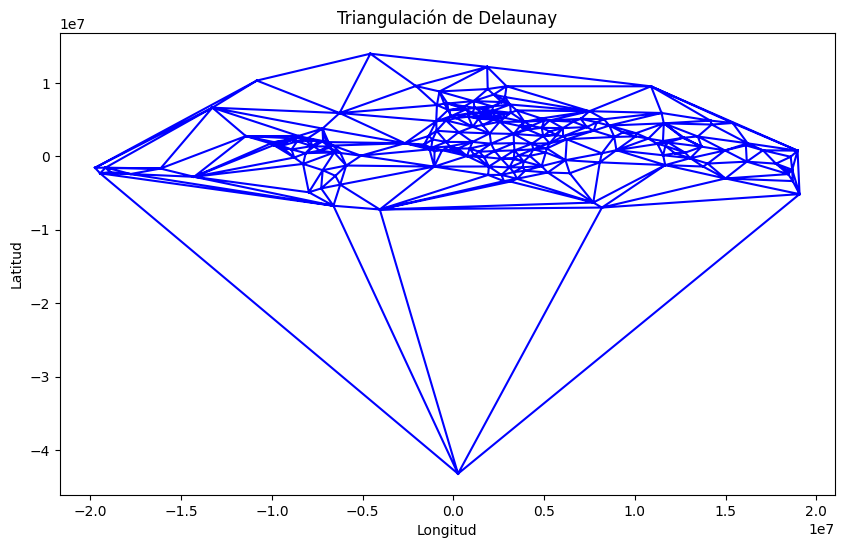

In [125]:
# Escriba su código aquí

# Importar la clase Delaunay
from scipy.spatial import Delaunay



def aplicar_triangulacion_delaunay(gdf):
    """Aplica la Triangulación de Delaunay a los puntos del GeoDataFrame.

    Args:
        gdf (GeoDataFrame): El GeoDataFrame que contiene los datos.

    Returns:
        array: Los índices de los vértices de los triángulos.
        array: Las coordenas de los centros de cada país
    """
    # Proyectar los datos a un sistema de coordenadas proyectadas adecuado
    gdf_projected = gdf.to_crs('EPSG:3395')

    #EPSG:4326 es una proyección más natural a la vista, pero causa WARNINGS
    #gdf_projected = gdf.to_crs('EPSG:4326')


    # Obtener los centroides de los países proyectados
    centroides = gdf_projected.geometry.centroid

    # Crear una matriz de coordenadas de los centroides
    coords = list(zip(centroides.x, centroides.y))

    # Aplicar la Triangulación de Delaunay
    delaunay = Delaunay(coords)

    return delaunay, centroides

# Obtener la triangulación y los centroides para dibujar
triangulacion, centroides = aplicar_triangulacion_delaunay(gdf)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear la triangulación
plt.triplot(centroides.x, centroides.y, triangulacion.simplices, color='blue')

# Añadir título y etiquetas
ax.set_title('Triangulación de Delaunay')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

## Ejercicio 07

Calcule y muestre el casco convexo para los puntos que se encuentran en el dataset.

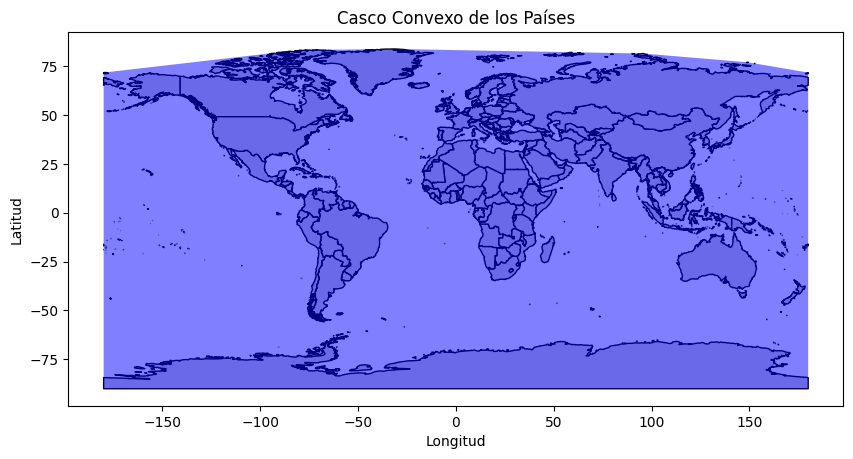

In [126]:
# Escriba su código aquí

# Calcular el casco convexo
convex_hull = gdf.unary_union.convex_hull

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotear los países
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotear el casco convexo
gpd.GeoSeries(convex_hull).plot(ax=ax, alpha=0.5, color='blue', linewidth=2)

# Añadir título y etiquetas
ax.set_title('Casco Convexo de los Países')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el gráfico
plt.show()

## Ejercicio 08

Calcule la sumatoria de mínimos cuadrados para los puntos que se encuentran en el dataset.

Suma de Mínimos Cuadrados: 4817126586999296.0


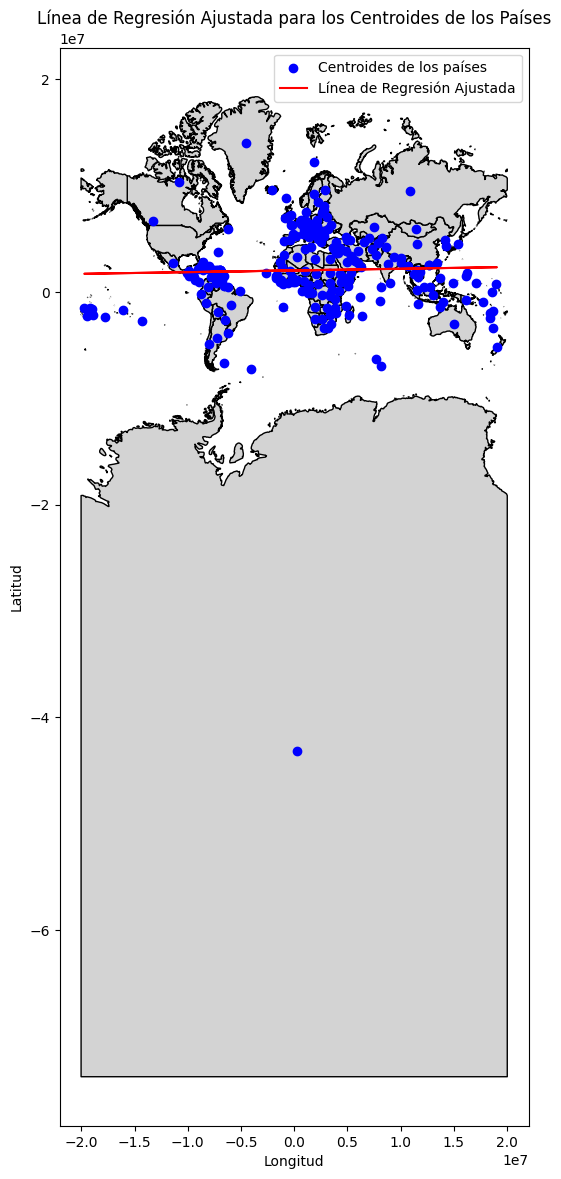

In [127]:
# Escriba su código aquí

# Importar la regresión lineal hecha con
from scipy.stats import linregress

# Proyectar correctamente los datos
# Esta línea elimina el WARNING, pero causa una visualización extraña
gdf = gdf.to_crs('EPSG:3395')

# Obtener los centroides de los países
centroides = gdf.geometry.centroid

# Extraer las coordenadas x e y de los centroides
x_coords = centroides.x
y_coords = centroides.y

# Ajustar una línea de regresión lineal utilizando linregress
slope, intercept, _, _, _ = linregress(x_coords, y_coords)

# Calcular las coordenadas y de la línea ajustada para cada x
y_pred = slope * x_coords + intercept

# Calcular la suma de mínimos cuadrados
ssr = sum((y_coords - y_pred) ** 2)

# Mostrar la suma de mínimos cuadrados
print("Suma de Mínimos Cuadrados:", ssr)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 14))

# Plotear los centroides de los países
gdf.plot(ax=ax, color='lightgrey', edgecolor='black')
ax.scatter(x_coords, y_coords, color='blue', label='Centroides de los países')

# Plotear la línea de regresión ajustada
ax.plot(x_coords, y_pred, color='red', label='Línea de Regresión Ajustada')

# Añadir título y etiquetas
ax.set_title('Línea de Regresión Ajustada para los Centroides de los Países')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

## Ejercicio 09

Calcule el agrupamiento (cluster) de nivel tres para los puntos que se encuentran en el dataset.

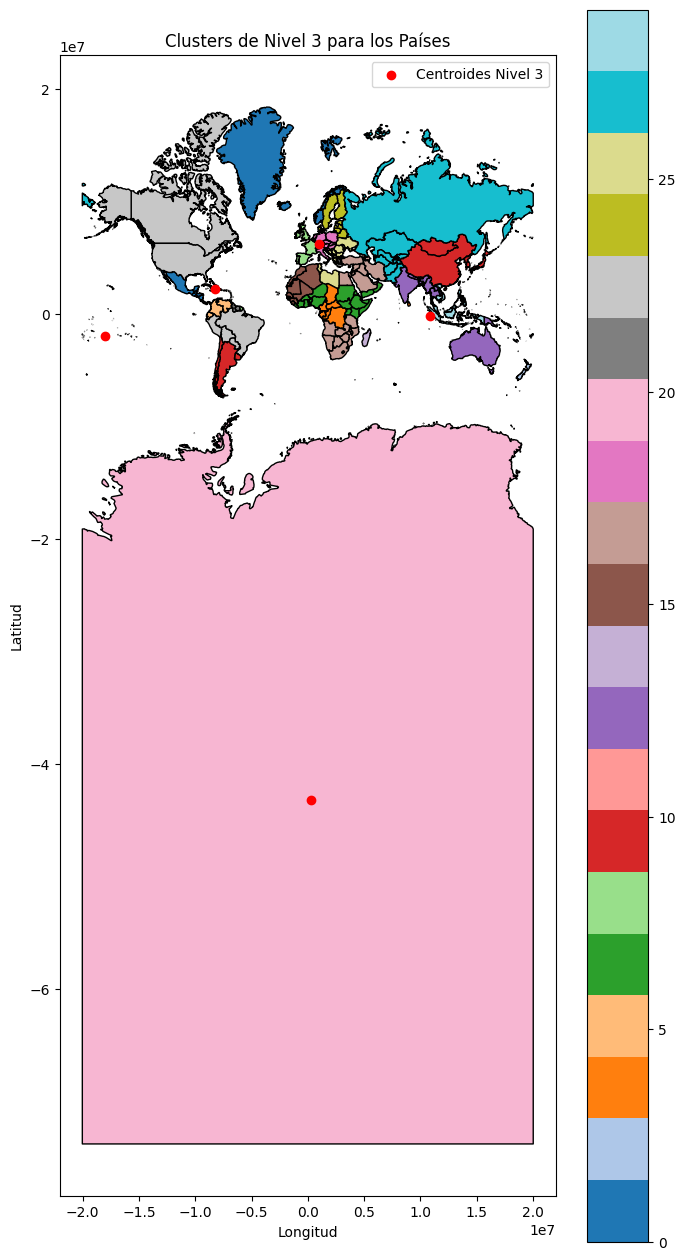

In [128]:
# Escriba su código aquí

# Importar la funciones para el cluster
from scipy.cluster.vq import kmeans, vq

# Convertir el GeoDataFrame a un CRS métrico para evitar WARNINGS
gdf = gdf.to_crs('EPSG:3395')
# La proyección EPSG:4326 proporciona una vista más natural
#gdf = gdf.to_crs('EPSG:4326')

# Obtener los centroides de los países
centroides = gdf.geometry.centroid

# Extraer las coordenadas x e y de los centroides
puntos = np.array(list(zip(centroides.x, centroides.y)))

# Clustering de nivel 1 con 30 centroides
centros_nivel_1, _ = kmeans(puntos, 30)
clusters_nivel_1, _ = vq(puntos, centros_nivel_1)

# Clustering de nivel 2 sobre los centroides del nivel 1, de 30 a 15 centros
centros_nivel_2, _ = kmeans(centros_nivel_1, 15)
clusters_nivel_2, _ = vq(centros_nivel_1, centros_nivel_2)

# Clustering de nivel 3 sobre los centroides del nivel 2, de 15 a 5 centros
centros_nivel_3, _ = kmeans(centros_nivel_2, 5)
clusters_nivel_3, _ = vq(centros_nivel_2, centros_nivel_3)

# Asignar los clusters iniciales al GeoDataFrame (30 centros de región)
gdf['cluster_nivel_3'] = clusters_nivel_1

# Crear el gráfico
fig, ax = plt.subplots(figsize=(8, 16))

# Plotear los países coloreados por cluster
gdf.plot(column='cluster_nivel_3',
         ax=ax,
         legend=True,
         cmap='tab20',
         edgecolor='black')

# Plotear los centroides de los clusters de nivel 3
ax.scatter(centros_nivel_3[:, 0],
           centros_nivel_3[:, 1],
           color='red',
           label='Centroides Nivel 3')

# Añadir título y etiquetas
ax.set_title('Clusters de Nivel 3 para los Países')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Añadir leyenda
ax.legend()

# Mostrar el gráfico
plt.show()
